In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
from constants import download_dir, output_dir
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import auc

In [135]:
import os
os.getcwd()
print(output_dir)
path_monthly = os.path.join(output_dir,"BTCUSDT-1m-monthly_data","BTCUSDT-1m.csv")
path_daily = os.path.join(output_dir,"BTCUSDT-1m-daily_data","BTCUSDT-1m.csv")
print(one_min_path)

D:\KISHORE\Binance-Data-Downloader\extracted_data
D:\KISHORE\Binance-Data-Downloader\extracted_data\BTCUSDT-15m-monthly_data\BTCUSDT-15m.csv


In [157]:
df = pd.read_csv(path_daily)

In [158]:
df.shape

(24480, 152)

In [159]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,...,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,BETA,CORREL,LINEARREG,LINEARREG_ANGLE,LINEARREG_INTERCEPT,LINEARREG_SLOPE,TSF,VAR
0,2023-01-01 05:30:00+05:30,16537.5,16538.0,16534.3,16538.0,170.576,2023-01-01 05:30:59.999000+05:30,2.820697e+06,946,103.782,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-01 05:31:00+05:30,16538.0,16538.0,16534.9,16534.9,44.287,2023-01-01 05:31:59.999000+05:30,7.323633e+05,570,19.098,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-01 05:32:00+05:30,16534.9,16535.0,16531.3,16531.4,100.228,2023-01-01 05:32:59.999000+05:30,1.657072e+06,456,21.026,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-01 05:33:00+05:30,16531.4,16531.4,16526.6,16526.9,317.879,2023-01-01 05:33:59.999000+05:30,5.254048e+06,980,79.937,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-01 05:34:00+05:30,16527.0,16529.3,16523.0,16529.2,211.281,2023-01-01 05:34:59.999000+05:30,3.491635e+06,1113,79.049,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.7176


In [160]:
df.describe()

,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,entry,...,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,BETA,CORREL,LINEARREG,LINEARREG_ANGLE,LINEARREG_INTERCEPT,LINEARREG_SLOPE,TSF,VAR
count,24480.000000,24480.000000,24480.000000,24480.000000,24480.000000,2.448000e+04,24480.000000,24480.000000,2.448000e+04,24479.000000,...,24480.0,24480.000000,24475.000000,24451.000000,24467.000000,24467.000000,24467.000000,24467.000000,24467.000000,24476.000000
mean,18086.440617,18091.517851,18081.866074,18086.629967,293.554963,5.554721e+06,1481.687745,149.059461,2.820014e+06,18086.505605,...,0.0,0.024510,0.417566,0.896224,18087.459010,3.401285,18085.003183,0.188910,18087.647920,115.761508
std,1717.391901,1721.448267,1713.678647,1717.475630,710.193221,1.379305e+07,2843.668098,401.127882,7.758886e+06,1717.400484,...,0.0,5.347461,0.665106,0.088068,1717.612520,46.664394,1716.535955,3.493779,1717.745049,1283.070252
min,16497.100000,16498.100000,16488.000000,16497.100000,2.374000,4.020029e+04,60.000000,0.457000,7.738733e+03,16497.100000,...,0.0,-100.000000,-6.254601,-0.618283,16493.117143,-88.707880,16496.357143,-44.334945,16490.550549,-0.000004
25%,16818.600000,16819.900000,16817.100000,16818.600000,58.219250,1.002329e+06,378.750000,24.209250,4.194097e+05,16818.600000,...,0.0,0.000000,0.019345,0.868393,16818.760000,-33.656636,16818.778571,-0.665824,16818.843407,2.693600
50%,17195.000000,17197.100000,17193.500000,17195.000000,122.921500,2.229029e+06,746.000000,58.677500,1.059032e+06,17195.000000,...,0.0,0.000000,0.344152,0.921188,17195.502857,3.621802,17194.705714,0.063297,17195.502198,11.612798
75%,19269.800000,19280.775000,19261.275000,19270.300000,269.661250,5.077995e+06,1533.000000,136.382750,2.535557e+06,19269.850000,...,0.0,0.000000,0.710885,0.952055,19267.648571,42.212519,19265.428571,0.907143,19269.578022,47.186598
max,21512.200000,21640.000000,21426.300000,21512.400000,21107.784000,4.405654e+08,76809.000000,14274.990000,2.980248e+08,21512.400000,...,0.0,100.000000,8.647997,0.992655,21427.668571,89.369598,21444.254286,90.883956,21493.692308,112534.869600


In [161]:
df.select_dtypes(include="object")

,open_time,close_time
0,2023-01-01 05:30:00+05:30,2023-01-01 05:30:59.999000+05:30
1,2023-01-01 05:31:00+05:30,2023-01-01 05:31:59.999000+05:30
2,2023-01-01 05:32:00+05:30,2023-01-01 05:32:59.999000+05:30
3,2023-01-01 05:33:00+05:30,2023-01-01 05:33:59.999000+05:30
4,2023-01-01 05:34:00+05:30,2023-01-01 05:34:59.999000+05:30
...,...,...
24475,2023-01-18 05:25:00+05:30,2023-01-18 05:25:59.999000+05:30
24476,2023-01-18 05:26:00+05:30,2023-01-18 05:26:59.999000+05:30
24477,2023-01-18 05:27:00+05:30,2023-01-18 05:27:59.999000+05:30
24478,2023-01-18 05:28:00+05:30,2023-01-18 05:28:59.999000+05:30


In [162]:
df.drop(["open_time", "close_time"], axis=1, inplace=True)

In [163]:
column_names = df.columns


missing_df = pd.DataFrame({
    "name" : column_names,
    "missing": df.isnull().mean().tolist()
}, columns=["name", "missing"])

missing_df["missing"] = missing_df["missing"] * 100

missing_df.sort_values("missing", ascending=False, inplace=True)


In [164]:
missing_df[:10]

,name,missing
19,entered_before,99.714052
16,shorts_win_after,70.375817
17,longs_win_after,40.669935
25,EMA-200,0.812908
63,TRIX,0.359477
35,TEMA,0.355392
70,HT_DCPHASE,0.257353
26,HT_TRENDLINE,0.257353
23,DEMA,0.236928
24,EMA-50,0.200163


In [165]:
df.drop(["entered_before", "longs_win_after", "shorts_win_after"], axis=1, inplace=True)

In [166]:
df.replace(np.nan, -500, inplace=True)

In [167]:
df.if_long.value_counts()

 1    14524
-1     9929
 0       27
Name: if_long, dtype: int64

In [168]:
df["if_long"] = df["if_long"].replace(-1, 0)
df["if_short"] = df["if_short"].replace(-1, 0)

In [169]:
df.if_long.value_counts()

1    14524
0     9956
Name: if_long, dtype: int64

In [170]:
df.if_short.value_counts()

0    17228
1     7252
Name: if_short, dtype: int64

### Long model

In [171]:
long_df = df.drop("if_short", axis=1)

In [172]:
long_y = df["if_long"]

In [173]:
long_x = df.drop("if_long", axis=1)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(long_x, long_y, test_size=0.1)

In [154]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [155]:
clf = RandomForestClassifier(max_depth=100, random_state=0)

In [156]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, random_state=0)

In [175]:
y_pred = clf.predict(X_test)

In [176]:
clf.score(X_test, y_test)

0.8717320261437909

In [177]:
clf.classes_

array([0, 1], dtype=int64)

In [178]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

In [179]:
cm

array([[ 747,  233],
       [  81, 1387]], dtype=int64)

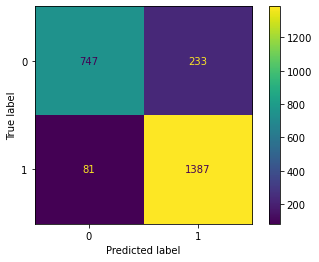

In [180]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)

disp.plot()


In [181]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83       980
           1       0.86      0.94      0.90      1468

    accuracy                           0.87      2448
   macro avg       0.88      0.85      0.86      2448
weighted avg       0.87      0.87      0.87      2448



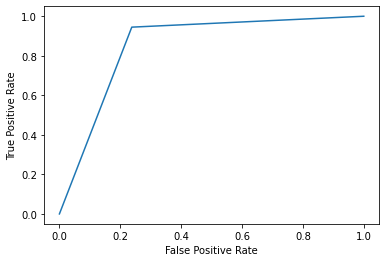

In [182]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [183]:
auc(fpr, tpr)

0.8535338931212813

### Short model

In [ ]:
short_df = df.drop("if_long", axis=1)

In [ ]:
short_y = df["if_short"]

In [ ]:
short_y.value_counts()

In [ ]:
short_x = df.drop("if_short", axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(short_x, short_y, test_size=0.1)

In [ ]:
clf = RandomForestClassifier(max_depth=100, random_state=0)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
clf.classes_

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

In [ ]:
cm

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)

disp.plot()


In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [ ]:
auc(fpr, tpr)

## Trying the above clf's for daily data

In [34]:
# Set up the arrays of symbols, chart times, and months
symbols = [
    SYMBOL_ARRAY[SYMBOL_ARRAY.index('BTCUSDT')],
    #     SYMBOL_ARRAY[SYMBOL_ARRAY.index('ETHUSDT')],
    #     SYMBOL_ARRAY[SYMBOL_ARRAY.index('ETHBUSD')],
    #     SYMBOL_ARRAY[SYMBOL_ARRAY.index('BTCBUSD')]
]
# symbols = [SYMBOL_ARRAY[SYMBOL_ARRAY.index('BTCUSDT')]]

# chart_times = CHART_TIME_ARRAY
chart_times = [
#     CHART_TIME_ARRAY[CHART_TIME_ARRAY.index('5m')],
#     CHART_TIME_ARRAY[CHART_TIME_ARRAY.index('1m')],
    CHART_TIME_ARRAY[CHART_TIME_ARRAY.index('15m')]
]


NameError: name 'SYMBOL_ARRAY' is not defined

In [ ]:
for symbol in symbols:
    for chart_time in chart_times:
        # Construct the file name
        file_name = f"{symbol}-{chart_time}.csv"
        file_path = Path(output_dir) / f"{symbol}-{chart_time}-daily_data/{file_name}"
        print(file_path)